

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [103]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [104]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## Description of the data

In [105]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [106]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Cleaning

In [107]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


## Checking the Quantitative values:

In [108]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())#Hypertension
print('Handicap:',df.Handicap.unique())#Handicap
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


## Converting the list into DataTime

In [109]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)

## To make it convenient we will add Week Day to the given data!!

In [110]:
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

## To make data reasonable we will remove outliners in the Age:

In [111]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 15)

## No-Show Map Column

 Since we added required data and then removed the unwanted data. Now to normalize No-Show column to 0's and 1's. <br>
We can make it to binary and then we will categorize it to the following: <br>
***
1. 0= Show up to the appointment.
2. 1= Failed to show up the appointment.
***

In [112]:
df['No_show'].replace({'No':0,'Yes':1},inplace=True)

## Checking the Awating time of patients

**Rounded number of days from Scheduling appointment is Awating Time.**

In [113]:
df['AwaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df["AwaitingTime"] = (df["AwaitingTime"] / np.timedelta64(1, 'D')).abs()

*Create new feature in which the appointment was booked that day.*

In [114]:
df['DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

*These will be the number of appointments missed by the patients.*

In [115]:
df['Num_App_Missed'] = df.groupby('PatientId')['No_show'].apply(lambda x: x.cumsum())

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null int64
WeekDay           110480 non-null int64
AwaitingTime      110480 non-null float64
DayOfWeek         110480 non-null int64
Num_App_Missed    110480 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(12), object(2)
memory usage: 16.0+ MB


## Exploring the Data Analysis

### Feature Relating to Show-Up

In [117]:
no_show = df["No_show"].value_counts()
print(no_show)

percent_no_show = no_show[1]/ no_show.sum() * 100
print("Percent who miss their scheduled appointments:",percent_no_show )

0    88168
1    22312
Name: No_show, dtype: int64
Percent who miss their scheduled appointments: 20.195510499637944


In [118]:
columns = ['Gender','Hypertension','Alcoholism','Diabetes']
for r in columns :
    print(df.groupby(r)['No_show'].mean())

Gender
F    0.20317
M    0.19970
Name: No_show, dtype: float64
Hypertension
0    0.209048
1    0.173058
Name: No_show, dtype: float64
Alcoholism
0    0.201970
1    0.201488
Name: No_show, dtype: float64
Diabetes
0    0.203641
1    0.180169
Name: No_show, dtype: float64


In [119]:
df.groupby('SMS_received')['No_show'].mean()

SMS_received
0    0.167036
1    0.275777
Name: No_show, dtype: float64

## What Factors are important to know for us to predict if patients attended their appeared appointment?

In [120]:
def prob_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']]

AttributeError: module 'seaborn' has no attribute 'plt'

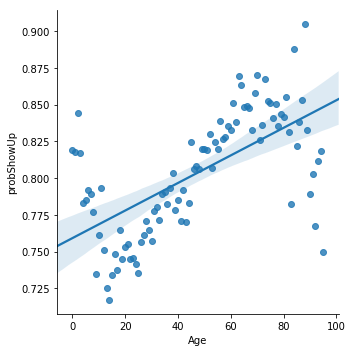

In [121]:
sns.lmplot(data = prob_show(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

No-Show rate on medical appointment is highly on the age of the patient.Cancellation rate is higher between the age of 14 and 24 years.

AttributeError: module 'seaborn' has no attribute 'plt'

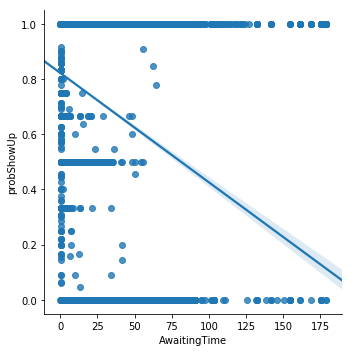

In [122]:
sns.lmplot(data = prob_show(df, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
sns.plt.title('Probability of showing up with respect to Awaiting Time')
sns.plt.ylim(0, 1)
sns.plt.show()

This is really Good as there is no dependency on AwaitingTime period in No-Show rate.

## Number of appointment missed by patients.

Probability with respect to decrease in the number of previous missed appointments.

AttributeError: module 'seaborn' has no attribute 'plt'

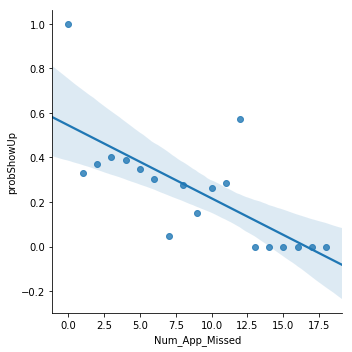

In [123]:
sns.lmplot(data = prob_show(df, 'Num_App_Missed'), x = 'Num_App_Missed', 
           y = 'probShowUp', fit_reg = True)
sns.plt.title('Probability of showing up with respect to Number of missed appiontments')
sns.plt.ylim(0, 1)
sns.plt.show()

*Clearly, Number of missed appiontments and Awaiting-Time and Age are good predictors of Showing up*

In [124]:
def prob_categorical(df, group_by):
    rows = []
    for item in group_by:
        #np.array((df[item] == level) & (df['No_show'] == 0), dtype = bool)
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            #n = len(df[(df[item] == level) & (df['No_show'] == 0)])
            n = len(np.array(df[(df[item] == level) & (df['No_show'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

## Probability of diseases and scholarship:

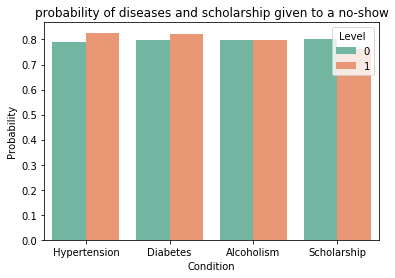

In [125]:
sns.barplot(data = prob_categorical(df,['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('probability of diseases and scholarship given to a no-show')
plt.ylabel('Probability')
plt.show()

Alcoholism and Diabetes are not good predictors of status, since probability depends upon the Scholarship and Hypertention.

### Probability of showing up number of handicaps:

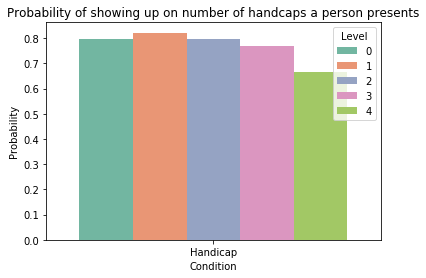

In [126]:
sns.barplot(data = prob_categorical(df,['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up on number of handcaps a person presents')
plt.ylabel('Probability')
plt.show()

The total amount of handicaps are as follows. Showing up decrease on increase number of handicaps of a person specially after two handicaps.

## Probability of showing up based on day of the Week:

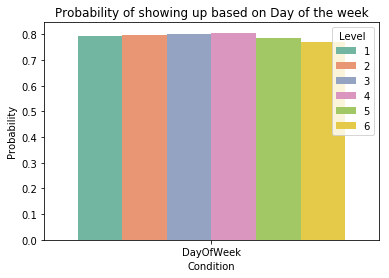

In [127]:
sns.barplot(data = prob_categorical(df,['DayOfWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up based on Day of the week')
plt.ylabel('Probability')
plt.show()

***Day of the week probability decrease on weekends!!***

# Conclusion

1. Certain age groups more likely to miss the appointment.
2. We noted that the SMS provided didn't gave much of the thrust in the public interest which means that they didn't show up.
3. There are number of the missed appointments. AwatingTime and age are good predictors of Showing up.
4. Patients with scholarships has higher percentage of not attending the appointments.

## Limitations

**Some of limitations are:**

1. Data outliners.

***Appointments from capital city of Espirito Santo State - Vitoria - Brazil only and that could also impact the results as we don't know if this is a random sample or if the selection of the data is biased or unbiased.***